# Basic Morphological Operators
***
Morphological operations are performed on an image, usually in binary form, using a kernel/structuring element of some kind. These kinds of operations are often performed to edit features or remove noise from an image. The two most basic morphological operations are erosion and dilation. 

Feel free to skip over the sections where the work is done manually and look over the opencv syntax. The manual code is mainly there to help explain the math and work behind the opencv methods.

#### Setup

In [2]:
# notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here are some kernels commonly applied to the following morphological operators. They are all 5 x 5, but can be of different sizes.

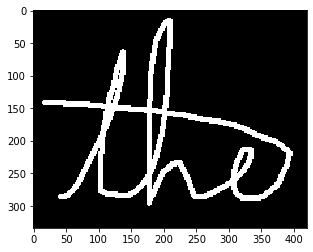

In [99]:
# Setting up sample kernels/structuring elements 
box_kernel = np.full((5,5), 255, dtype='uint8')
cross_kernel = np.array([[0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0],
                         [1, 1, 1, 1, 1],
                         [0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0]], dtype='uint8') * 255
ellipse_kernel = np.array([[0, 0, 1, 0, 0],
                           [1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1],
                           [0, 0, 1, 0, 0]], dtype='uint8') * 255

# Reading in image and creating binary version
writing = cv2.imread('../Image_Data/cursive.png', 0)
ret, binary_writing = cv2.threshold(writing, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
plt.imshow(binary_writing, cmap='gray')

***
### Dilation
Dilation can be used to close up holes in objects and increase the size of the foreground. It is useful for joining objects together.

The following method dilates the image passed in manually.

In [104]:
# expects a binary image of 2 dimensions (grayscale) and a kernel
def dilate(img, kernel):
    padding = (int)(len(kernel)/2) # Computing number of rows of padding
    # Setting up padded image 
    padded_img = np.zeros((len(img) + padding*2, len(img[0]) + padding*2), dtype='uint8')
    padded_img[padding:len(img) + padding, padding:len(img[0]) + padding] = img
    dilated_img = padded_img.copy()
    # Apply the kernel to every pixel in the image 
    for row in range(padding, len(img)):
        for col in range(padding, len(img[row])):
            # If the pixel is white, get the current neighborhood and apply bitwise or 
            if padded_img[row, col] == 255:
                curr_nhbors = dilated_img[row-padding:row+padding+1, col-padding:col+padding+1]
                dilated_img[row-padding:row+padding+1, col-padding:col+padding+1] = cv2.bitwise_or(curr_nhbors, kernel)
    # return the dilated image without the padding added beforehand
    return dilated_img[padding:len(img) + padding, padding:len(img[0]) + padding]

In [114]:
dilated_writing = dilate(binary_writing, box_kernel)

In [115]:
# opencv syntax for binary dilation
dilated_writing_cv = cv2.dilate(binary_writing, box_kernel, iterations=1)

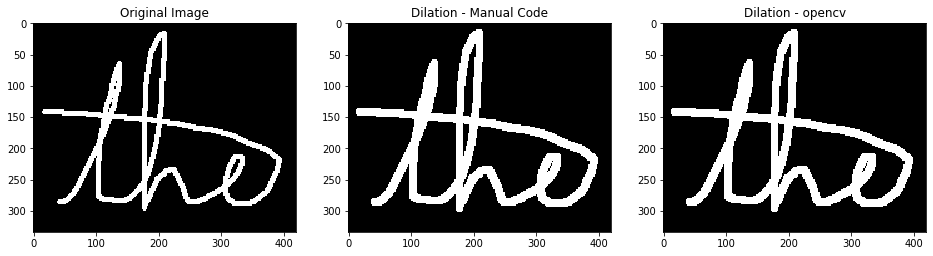

In [116]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Dilation - Manual Code')
axarr[1].imshow(dilated_writing, cmap='gray')
axarr[2].set_title('Dilation - opencv')
axarr[2].imshow(dilated_writing_cv, cmap='gray')

The resulting images produced by the handwritten dilate method and the opencv method produced the same results. By using dilation, the loop in t was closed, and the hole in the e shrunk considerably.

***
### Binary Erosion
Erosion is useful for removing small patches or stray pixels of noise, and can disconnect connected objects. Erosion shrinks the amount of white/the size of the foreground.

In [225]:
# expects binary image 
# Sorry, this algorithm is kinda (very) slow
def erode(img, kernel):
    padding = (int)(len(kernel)/2) # calculating required number of padding rows
    # Creating padded image 
    padded_img = np.zeros((len(img) + padding*2, len(img[0]) + padding*2), dtype='uint8') 
    padded_img[padding:len(img) + padding, padding:len(img[0]) + padding] = img
    eroded_img = padded_img.copy()
    for row in range(padding,len(img)):
        for col in range(padding, len(img[row])):
            curr_nghbors = padded_img[row-padding:row+padding+1, col-padding:col+padding+1]
            # If the current neighborhood contains the kernel, then keep that pixel white
            if np.array_equal(kernel, cv2.bitwise_and(curr_nghbors, kernel)):
                eroded_img[row, col] = 255;
            else:
                eroded_img[row, col] = 0;
    # return the eroded image without the padding added beforehand
    return eroded_img[padding:len(img) + padding, padding:len(img[0]) + padding]

In [226]:
eroded_writing = erode(binary_writing, ellipse_kernel)

In [213]:
# opencv syntax for binary erosion
eroded_writing_cv = cv2.erode(binary_writing, ellipse_kernel, iterations=1)

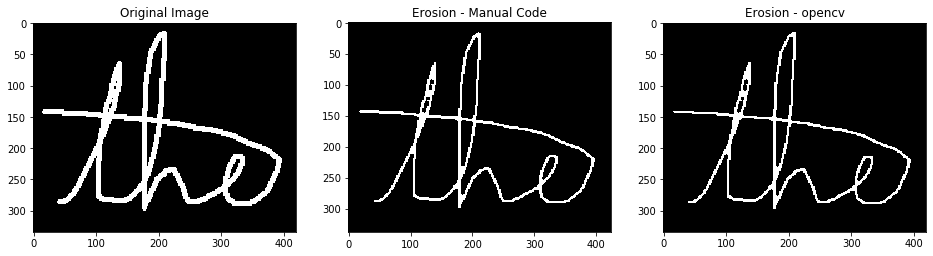

In [214]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Erosion - Manual Code')
axarr[1].imshow(eroded_writing, cmap='gray')
axarr[2].set_title('Erosion - opencv')
axarr[2].imshow(eroded_writing_cv, cmap='gray')

The manual erosion method that I wrote works quite well, but there are slightly different results compared to the opencv method. The method is also quite slow as of right now.

***
### Opening
Opening is useful for removing salt and pepper noise while maintaining the size of the foreground much more effectively than erosion. This is because opening is simply an erosion followed by a dilation.

The code below randomly creates white noise on the binary writing image.

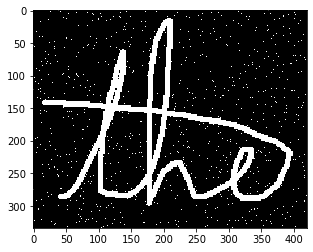

In [216]:
import random

noisy_writing = binary_writing.copy()
for i in range(2000):
    rand_x = random.randint(0, len(noisy_writing) - 1)
    rand_y = random.randint(0, len(noisy_writing[0]) - 1)
    noisy_writing[rand_x, rand_y] = 255
plt.imshow(noisy_writing,cmap='gray')

In [217]:
opened_writing = dilate(erode(noisy_writing, box_kernel), box_kernel)

In [218]:
# opencv syntax
opened_writing_cv = cv2.morphologyEx(noisy_writing, cv2.MORPH_OPEN, box_kernel)

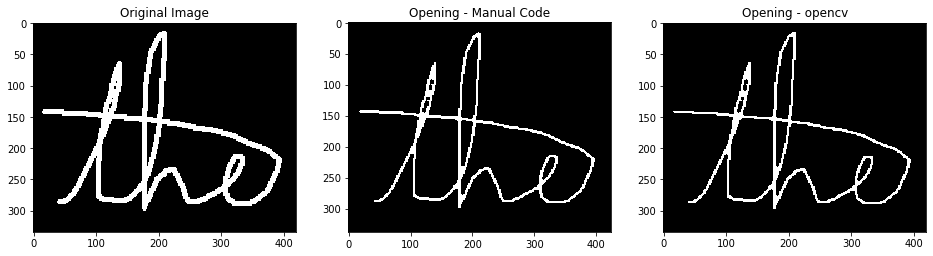

In [219]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(binary_writing, cmap='gray')
axarr[1].set_title('Opening - Manual Code')
axarr[1].imshow(eroded_writing, cmap='gray')
axarr[2].set_title('Opening - opencv')
axarr[2].imshow(eroded_writing_cv, cmap='gray')

Most if not all of the noise is gone from the images, while the original writing is thinned somewhat.

***
## References
* Information on many morphological operators: https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
* Python morphological operations docs: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
* dilation and erosion in C++: https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html
* Erosion Article: https://en.wikipedia.org/wiki/Erosion_(morphology)
* Dilation Article: https://en.wikipedia.org/wiki/Dilation_(morphology)
* General Morphology: https://en.wikipedia.org/wiki/Mathematical_morphology
***